In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading Data
age_df = pd.read_csv("Resources/MLB-player-final-dataset.csv")
age_df.head()

,Unnamed: 0,IDfg,Season,Name,Age,G,AB,PA,BB%,K%,...,Z-Swing%,O-Contact%,Z-Contact%,F-Strike%,SwStr%,Zone%,Clutch,UBR,WAR,age_bracket
0,0,18401,2023,Ronald Acuna Jr.,25,159,643,735,0.109,0.114,...,0.728,0.738,0.878,0.589,0.078,0.422,1.16,2.2,8.4,2
1,1,13611,2023,Mookie Betts,30,152,584,693,0.139,0.154,...,0.630,0.643,0.939,0.595,0.058,0.421,-0.72,2.3,8.3,3
2,2,5361,2023,Freddie Freeman,33,161,637,730,0.099,0.166,...,0.792,0.688,0.880,0.614,0.094,0.426,-1.50,1.4,7.9,3
3,3,14344,2023,Matt Olson,29,162,608,720,0.144,0.232,...,0.735,0.695,0.777,0.556,0.119,0.395,-0.60,2.3,6.7,3
4,4,19755,2023,Shohei Ohtani,28,135,497,599,0.152,0.239,...,0.707,0.565,0.814,0.571,0.139,0.393,-2.08,1.7,6.6,2


In [3]:
# Cleaning Data
# columns_to_drop = ["Unnamed: 0", "IDfg", "Name", "Age", "EV", "LA", "Barrel%", "HardHit%", "maxEV", "UBR"]

columns_to_drop = ["Unnamed: 0", "Name", "Age", "IDfg"]
# # Drop the columns
age_df.drop(columns=columns_to_drop, inplace=True)

# # Display the DataFrame after dropping columns
# pd.set_option('display.max_columns', None)  # Set to display all columns
# age_df.head()

In [4]:
# Drop NaN/na
age_df = age_df.dropna()


In [5]:
# Define features set
X = age_df.copy()
X.drop('age_bracket', axis=1, inplace=True)
X.head()

,Season,G,AB,PA,BB%,K%,BB/K,OBP,SLG,OPS,...,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%,F-Strike%,SwStr%,Zone%,Clutch,UBR,WAR
0,2023,159,643,735,0.109,0.114,0.95,0.416,0.596,1.012,...,0.268,0.728,0.738,0.878,0.589,0.078,0.422,1.16,2.2,8.4
1,2023,152,584,693,0.139,0.154,0.90,0.408,0.579,0.987,...,0.200,0.630,0.643,0.939,0.595,0.058,0.421,-0.72,2.3,8.3
2,2023,161,637,730,0.099,0.166,0.60,0.410,0.567,0.976,...,0.301,0.792,0.688,0.880,0.614,0.094,0.426,-1.50,1.4,7.9
3,2023,162,608,720,0.144,0.232,0.62,0.389,0.604,0.993,...,0.295,0.735,0.695,0.777,0.556,0.119,0.395,-0.60,2.3,6.7
4,2023,135,497,599,0.152,0.239,0.64,0.412,0.654,1.066,...,0.333,0.707,0.565,0.814,0.571,0.139,0.393,-2.08,1.7,6.6


In [6]:
# Define target vector
y = age_df['age_bracket']


In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [14]:
# Model evaluation
confusion_matrix(y_test, predictions)

array([[  0, 116,   8,   0,   0],
       [  1, 610,  92,   0,   0],
       [  0, 329, 118,   0,   0],
       [  0,  36,  38,   0,   0],
       [  0,   3,   3,   0,   0]], dtype=int64)

In [15]:
target_names = ["19-23 (1)", "24-28 (2)", "29-34 (3)", "35-39 (4)", "40-44 (5)"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   19-23 (1)       0.00      0.00      0.00       124
   24-28 (2)       0.56      0.87      0.68       703
   29-34 (3)       0.46      0.26      0.33       447
   35-39 (4)       0.00      0.00      0.00        74
   40-44 (5)       0.00      0.00      0.00         6

    accuracy                           0.54      1354
   macro avg       0.20      0.23      0.20      1354
weighted avg       0.44      0.54      0.46      1354



c:\Users\chris\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chris\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.03157458062739832, 'UBR'),
 (0.028814094187678402, 'BABIP'),
 (0.02811686638293385, 'Clutch'),
 (0.02750531038808674, 'O-Swing%'),
 (0.027447960400474414, 'F-Strike%'),
 (0.02720753967400981, 'maxEV'),
 (0.026807265928583027, 'Zone%'),
 (0.026374857055454344, 'Oppo%'),
 (0.026233922902684916, 'Soft%'),
 (0.026001686632086095, 'Med%'),
 (0.025963010022932737, 'LD%'),
 (0.02596146579937643, 'K%'),
 (0.025858957456913263, 'LA'),
 (0.025251171746890178, 'GB%'),
 (0.02520868072482552, 'Pull%'),
 (0.025138770830060147, 'Z-Swing%'),
 (0.025002471124988306, 'HardHit%'),
 (0.02494927514139004, 'O-Contact%'),
 (0.024933639306094272, 'Z-Contact%'),
 (0.02487265231072923, 'CSW%'),
 (0.024861065667389992, 'Cent%'),
 (0.024627889109636453, 'G'),
 (0.024548488304786925, 'Hard%'),
 (0.02434489853234213, 'WAR'),
 (0.024327236885298975, 'BB%'),
 (0.024306993776653563, 'FB%'),
 (0.024015348694572752, 'EV'),
 (0.023987454257474162, 'BB/K'),
 (0.023807270937841612, 'CStr%'),
 (0.023784021496100365, 'Sw

In [17]:
# Visualize feature importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')

C:\Users\chris\AppData\Local\Temp\ipykernel_28740\1822832750.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)


<Figure size 2000x2000 with 0 Axes>

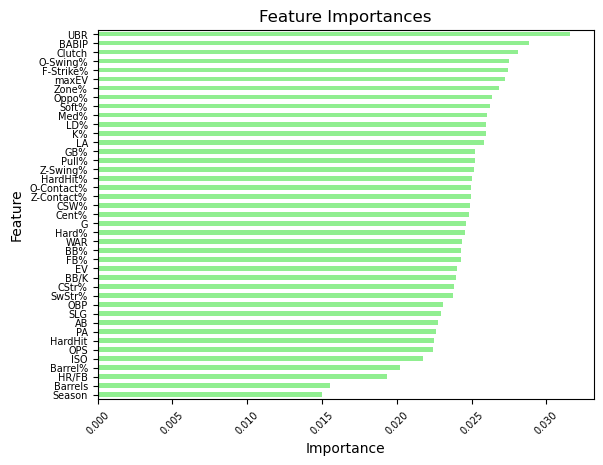

In [18]:
# Visualize feature importance
import matplotlib.pyplot as plt

importances_sorted = importances_sorted[::-1]
# Adjust figure size
plt.figure(figsize=(20, 20))

# Plot bar graph
importances_sorted.plot(kind='barh', color='lightgreen', title='Feature Importances', legend=False)

# Adjust font size
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Rotate y-axis labels for better readability
plt.gca().invert_yaxis()
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45)

plt.show()